In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score , confusion_matrix,roc_curve,roc_auc_score
import io
import requests


import warnings
warnings.filterwarnings('ignore')

#import all the necessary liabriries requried if needed with insert more 

In [2]:
df = pd.read_csv(r'raw.githubusercontent.com_dsrscientist_dataset3_main_glass.csv')
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [3]:
df.shape
#there is 213 rows and 11 column`

(213, 11)

In [4]:
df.isnull().sum()
#no null value present in dataset 

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

In [5]:
df.info()
#no object value only integer value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [6]:
df.duplicated().sum()
#checked any dupliacte available or not so no value present


0

In [7]:
df.describe()
#nu null value present
#type which is categorical in nature is represented as integers
# there is no order among the classes
#Above statistics shows that data is across all attributes is not in same range, so we will normalize the data first

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
df.columns = names
df.head()
#first meanigful name has been given to the headings 

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [9]:
df= df.drop('Id', axis = 1)
df
#drop id unuse column 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


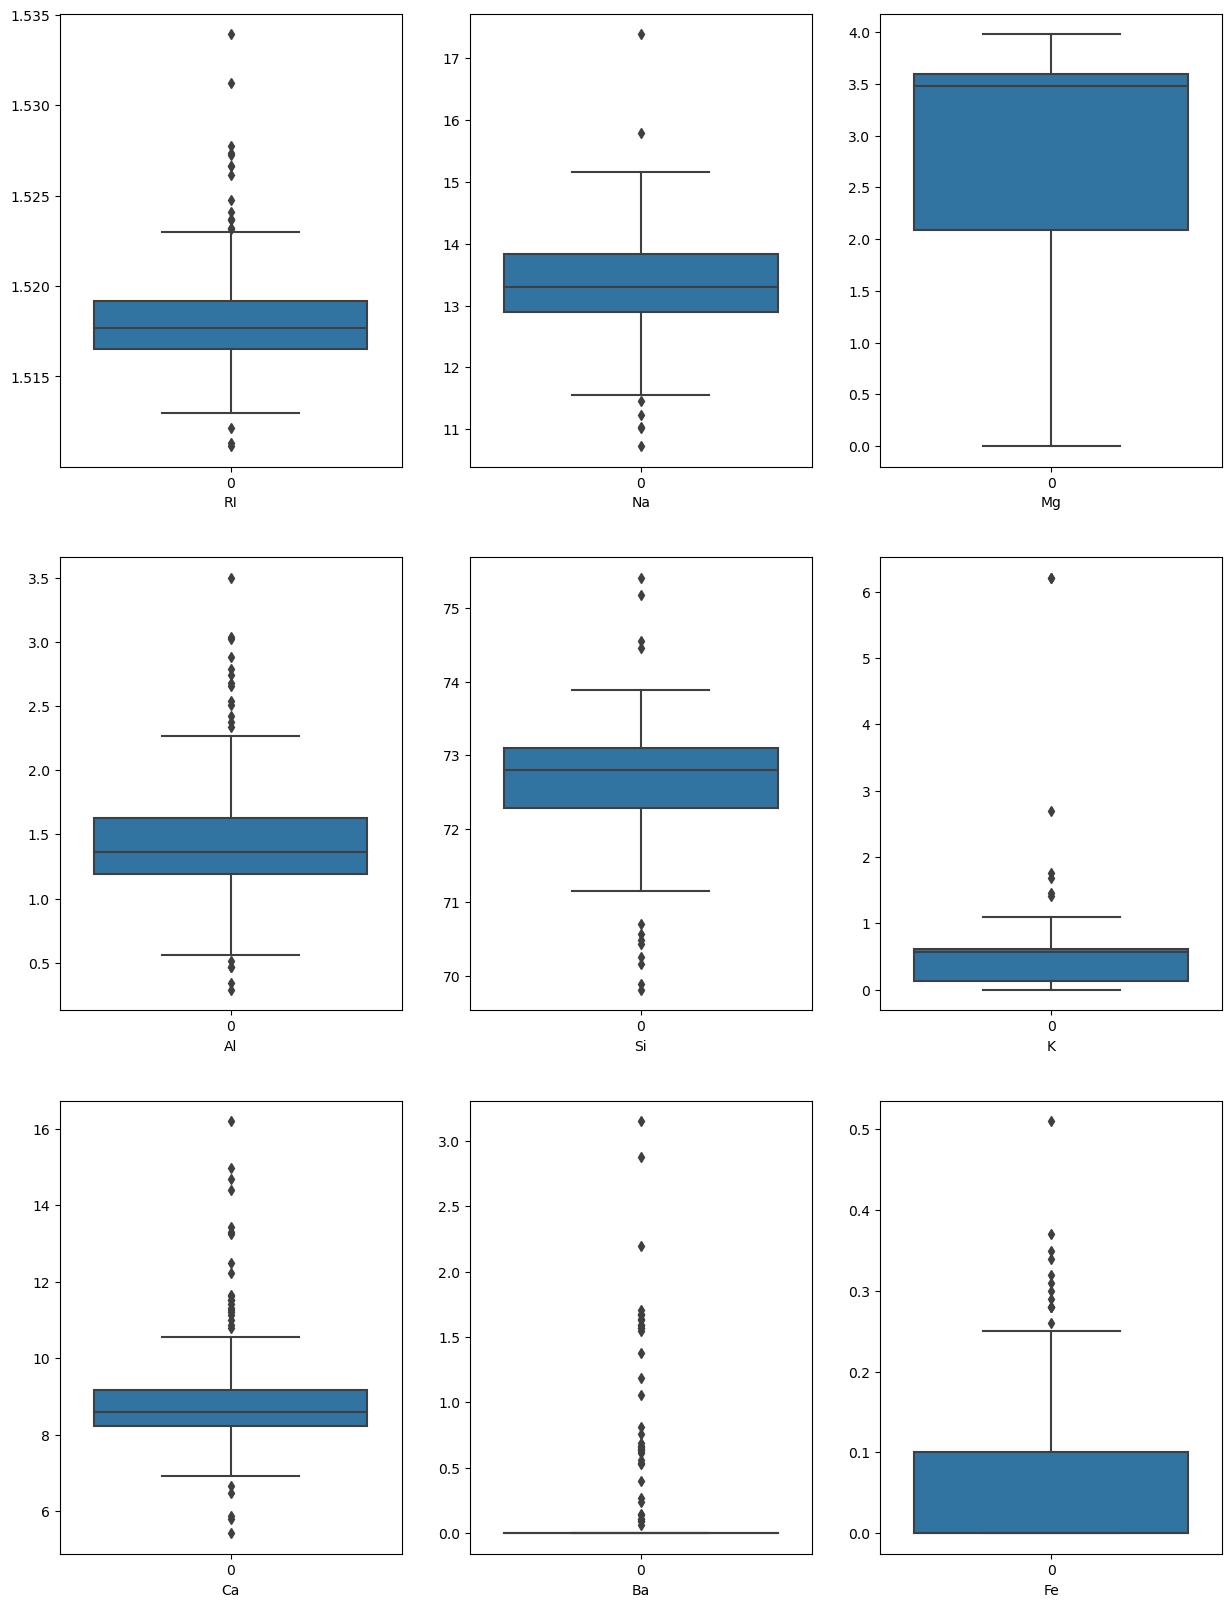

In [10]:
plt.figure(figsize=(15,20))

plotnumber = 1

for c in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(data=df[c])
        plt.xlabel(c)
        
    plotnumber+=1
    
plt.show() 
#there are many outlier present in all the feature we have to treat the outliers  
# we can use with iqr method or z_score method to treat outlier

In [11]:
df.nunique()
#unique categories in dataset

RI            177
Na            142
Mg             93
Al            117
Si            132
K              65
Ca            143
Ba             34
Fe             32
glass_type      6
dtype: int64

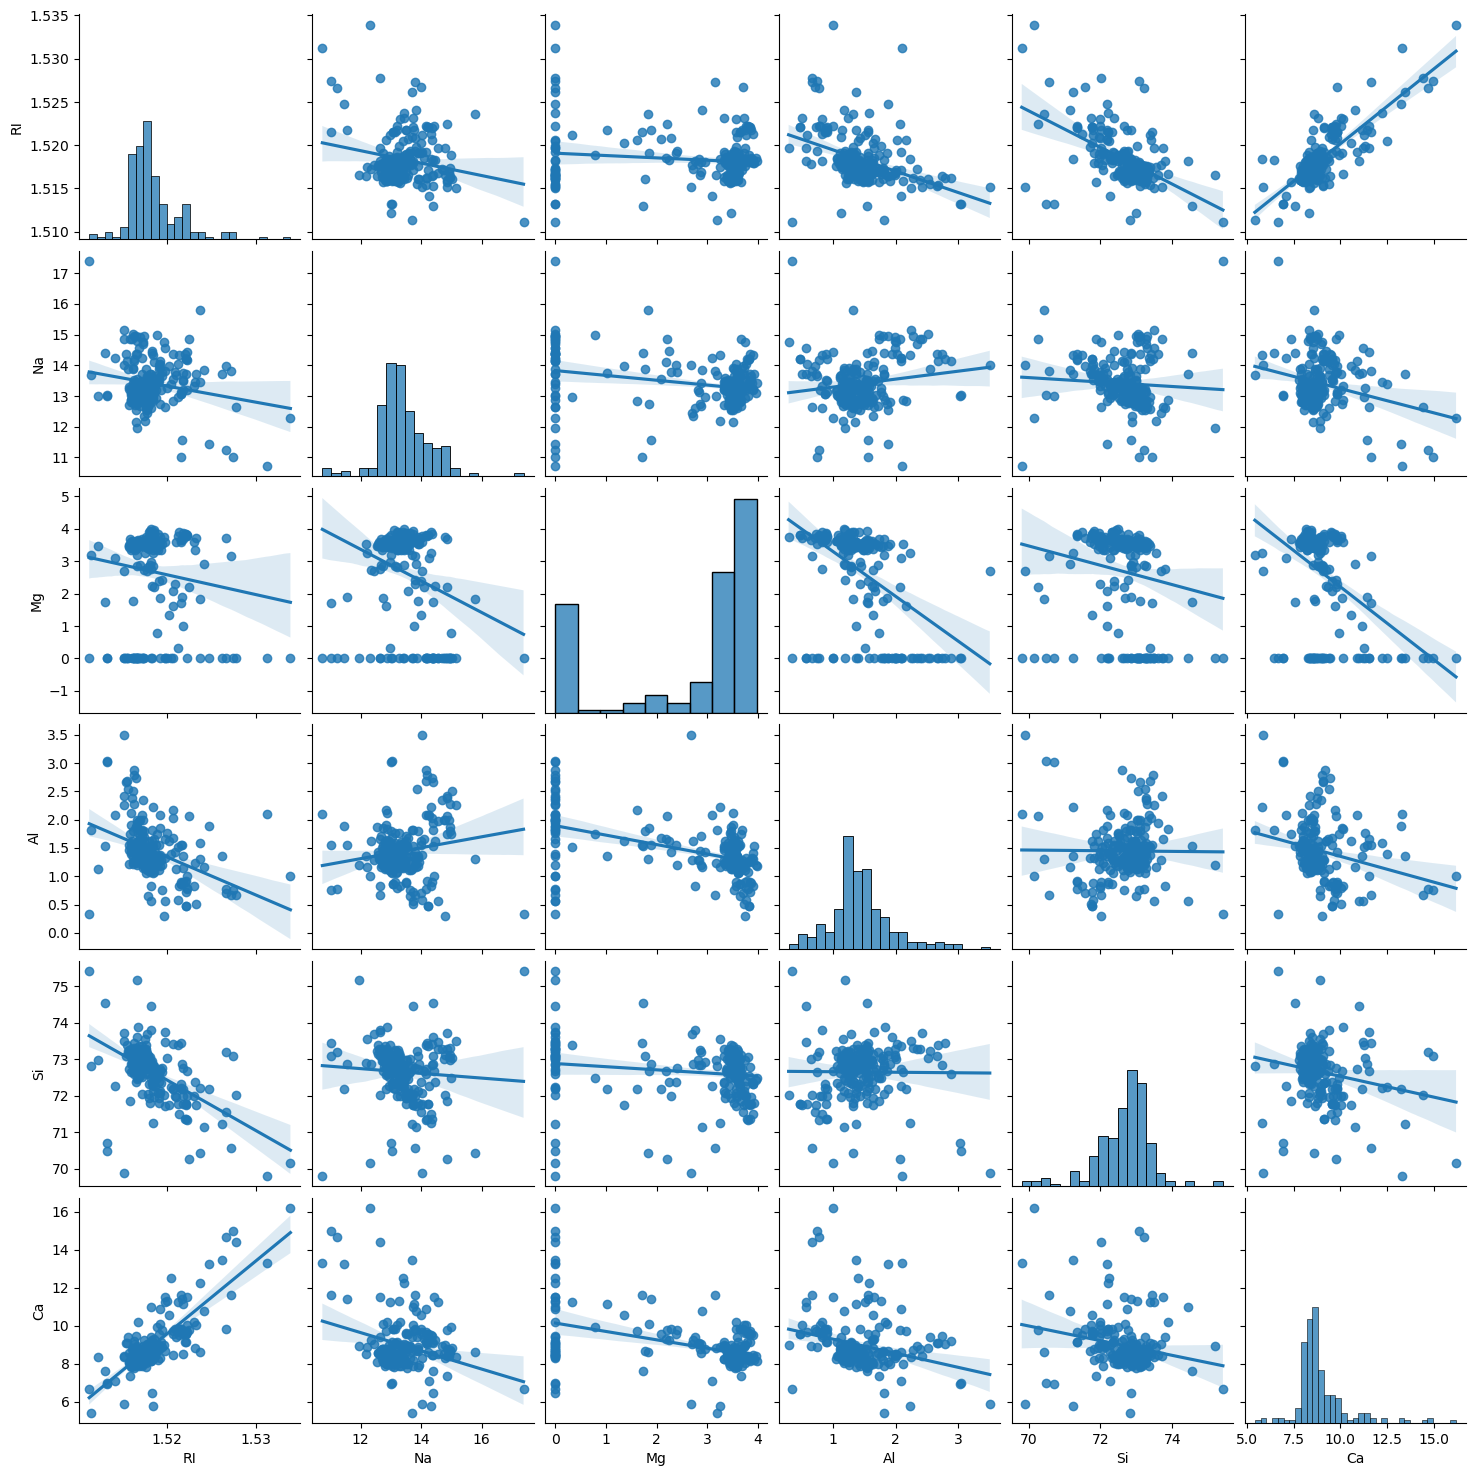

In [12]:
sns.pairplot(df[['RI','Na','Mg','Al','Si','Ca']],kind='reg')
#Points are scattered , there is some relationship between ca and re index 
#si and ri opposite relation


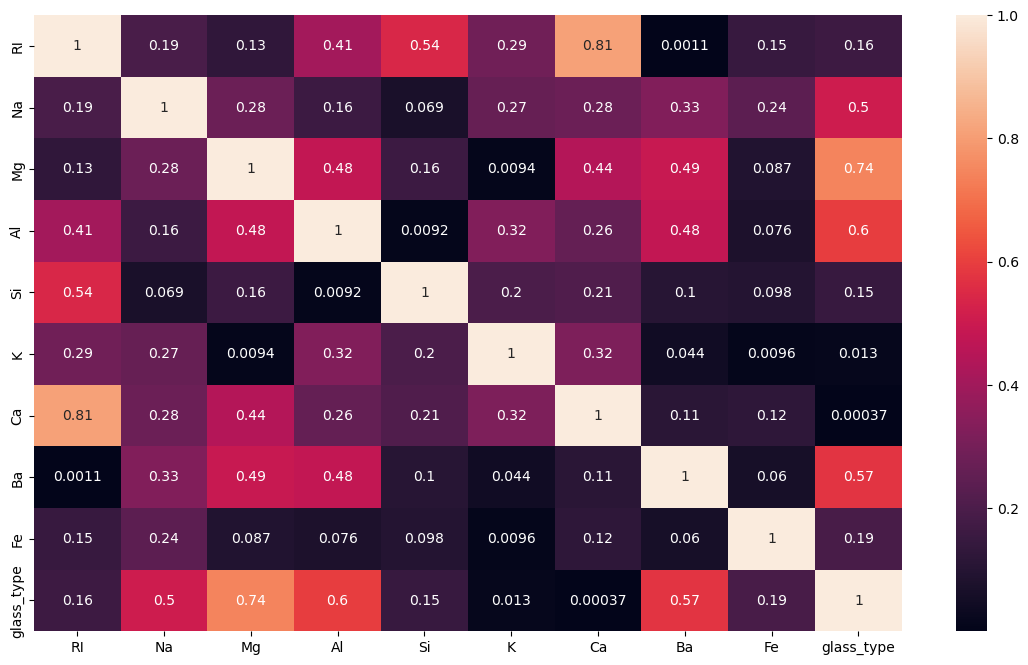

In [13]:
df_corr = df.corr().abs()

plt.figure(figsize=(14,8))
sns.heatmap(df_corr,annot=True)
plt.show()
# RI and ca has high correlation

In [14]:
# now will seperate the feature and lable 
x = df.drop('glass_type',axis=1)
y= df['glass_type']

In [15]:
## normalizing/Scalling the data  

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x= scaler.transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8
0,0.283582,0.475188,0.904523,0.333333,0.521429,0.077295,0.223048,0.000000,0.000000
1,0.220808,0.421053,0.891960,0.389408,0.567857,0.062802,0.218401,0.000000,0.000000
2,0.285777,0.372932,0.927136,0.311526,0.500000,0.091787,0.259294,0.000000,0.000000
3,0.275241,0.381955,0.909548,0.295950,0.583929,0.088567,0.245353,0.000000,0.000000
4,0.211150,0.309774,0.907035,0.414330,0.564286,0.103060,0.245353,0.000000,0.509804
...,...,...,...,...,...,...,...,...,...
208,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.000000
209,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.000000
210,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.000000
211,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.000000


In [17]:
from sklearn import preprocessing
x= preprocessing.scale(x)


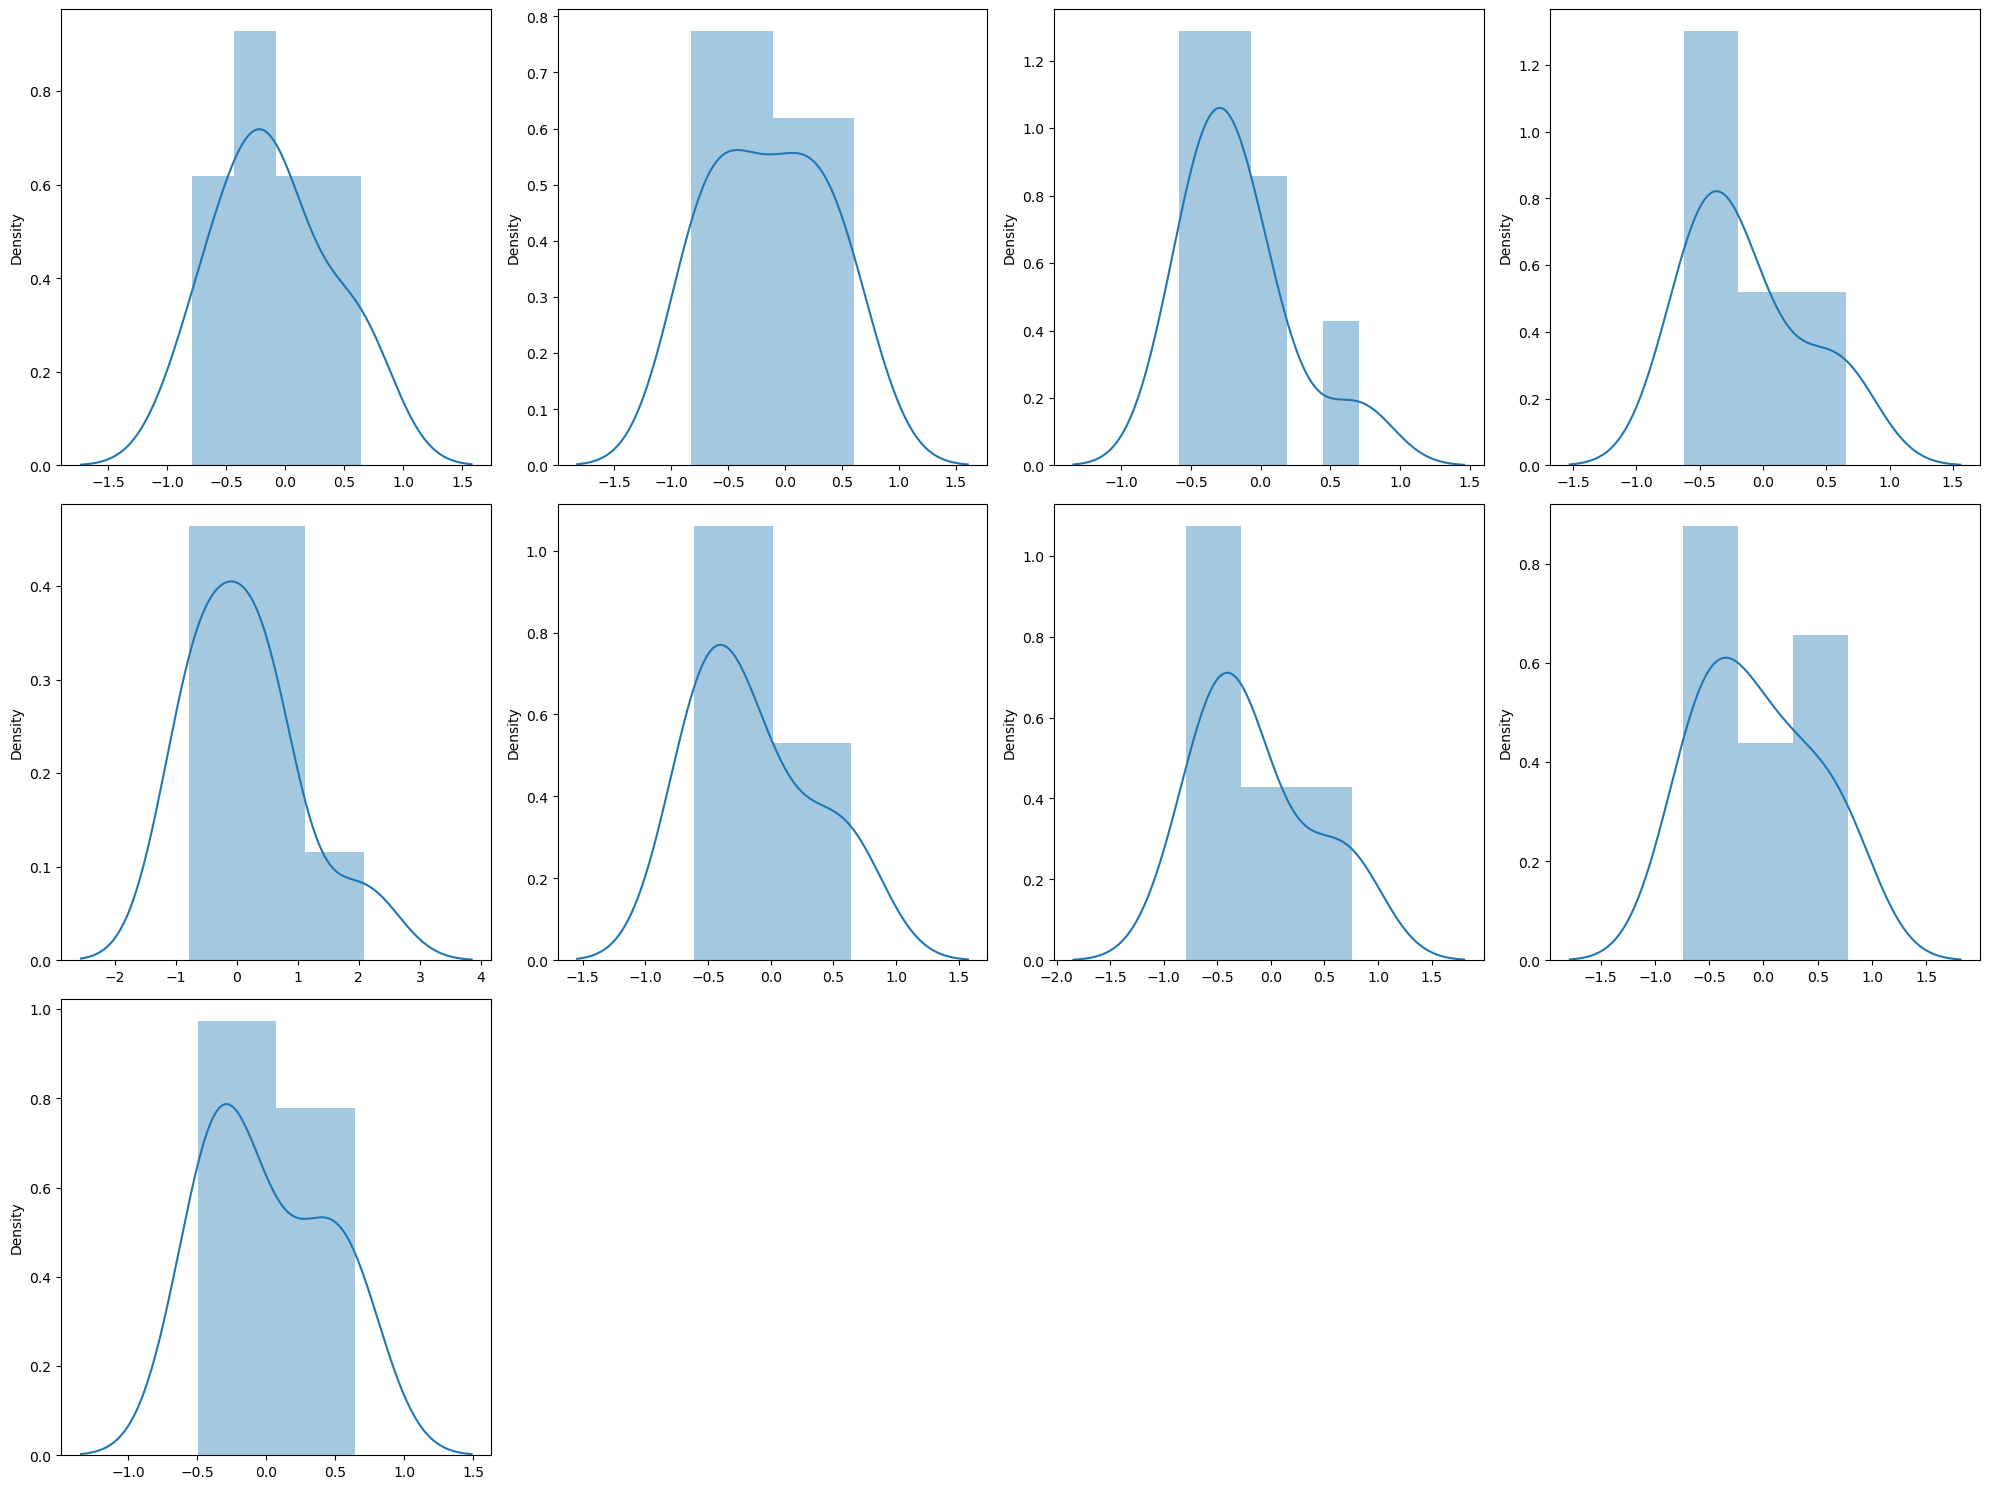

In [26]:
plt.figure(figsize=(20,15))
plotnumber = 1

for i in x:
    if plotnumber<=9:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(i)
        
        
    plotnumber+=1
plt.tight_layout()
#Above diagrams show that after preprocessing skewness is reduced, and data is more normalized

In [27]:
#train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=222)

In [28]:

#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [73]:
# defined a funcution 
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        
        
        print('============trainresult===============')
        
        print(f'accuracy_score{accuracy_score(y_train,y_pred) *  100:.2f}%' )
        
    elif train == False:
        
        pred = clf.predict(x_test)
        
        print('============testresult===============')
        
        print(f'accuracy_score {accuracy_score(y_test,pred)* 100:.2f}%')
        
        print(classification_report(y_test,pred,digits = 2))

In [74]:
log = LogisticRegression()

log.fit(x_train,y_train)
y_pred = log.predict_proba(x_test)
y_pred

array([[4.26947491e-01, 4.31456980e-01, 1.03322677e-01, 9.41033627e-03,
        1.62363313e-02, 1.26261842e-02],
       [3.01413313e-01, 4.60892661e-01, 1.20619231e-01, 1.03080138e-02,
        6.87782305e-02, 3.79885501e-02],
       [4.64687371e-01, 4.67745848e-01, 5.28780094e-02, 1.05534497e-02,
        1.27125268e-03, 2.86406860e-03],
       [3.95585120e-01, 5.49803037e-01, 4.51041409e-02, 6.66596368e-03,
        5.29931344e-04, 2.31180687e-03],
       [2.57939169e-01, 6.54866645e-01, 5.94780395e-02, 2.36357786e-02,
        1.31281379e-03, 2.76755426e-03],
       [4.94035237e-01, 3.91041313e-01, 9.00816950e-02, 1.15503624e-02,
        6.99715826e-03, 6.29423435e-03],
       [7.55767259e-06, 7.66090487e-03, 9.66842689e-05, 5.13295365e-03,
        6.34109850e-02, 9.23690915e-01],
       [6.60583229e-01, 2.69110652e-01, 6.87136784e-02, 6.25361508e-04,
        7.26796226e-04, 2.40282206e-04],
       [5.69069276e-02, 5.43252056e-01, 5.41389934e-02, 2.98601888e-01,
        1.72708206e-02, 

In [75]:
metric_score(log,x_train,x_test,y_train,y_test,train = True)
metric_score(log,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score71.70%
============testresult===============
accuracy_score 62.96%
              precision    recall  f1-score   support

           1       0.64      0.50      0.56        18
           2       0.48      0.76      0.59        17
           3       0.00      0.00      0.00         5
           5       0.67      1.00      0.80         2
           6       1.00      0.67      0.80         3
           7       1.00      0.89      0.94         9

    accuracy                           0.63        54
   macro avg       0.63      0.64      0.62        54
weighted avg       0.61      0.63      0.60        54



In [76]:
cv_score = (cross_val_score(log, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check 

Cross Validation Score: 60.56478405315614


In [77]:
#DecisionTreeClassifier model
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score100.00%
============testresult===============
accuracy_score 75.93%
              precision    recall  f1-score   support

           1       0.74      0.78      0.76        18
           2       0.79      0.65      0.71        17
           3       0.57      0.80      0.67         5
           5       0.67      1.00      0.80         2
           6       1.00      0.67      0.80         3
           7       0.89      0.89      0.89         9

    accuracy                           0.76        54
   macro avg       0.77      0.80      0.77        54
weighted avg       0.77      0.76      0.76        54



In [78]:
cv_score = (cross_val_score(clf, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 62.42524916943522


In [79]:
from sklearn.model_selection import GridSearchCV
#for hyper parammeter tuning 

In [80]:
#hyper parameter tunning 
grid_params = {'criterion':['gini','entropy'],
              'max_depth':range(12,15),
              'min_samples_leaf':range(4,6),
              'min_samples_split':range(3,5),
              'max_leaf_nodes':range(5,10)}

grid = GridSearchCV(estimator=clf,
                   param_grid = grid_params,
                   cv = 5)


In [81]:
#time to train the data for best paraam and get best out of it
grid.fit(x_train,y_train)
best = grid.best_params_
best

{'criterion': 'gini',
 'max_depth': 12,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 4}

In [82]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 12,max_leaf_nodes=9 ,min_samples_leaf= 5,min_samples_split=3)

clf.fit(x_train,y_train)
#best params and traning data 

DecisionTreeClassifier(max_depth=12, max_leaf_nodes=9, min_samples_leaf=5,
                       min_samples_split=3)

In [83]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)
#afterbest params result got better

============trainresult===============
accuracy_score77.99%
============testresult===============
accuracy_score 68.52%
              precision    recall  f1-score   support

           1       0.85      0.61      0.71        18
           2       0.58      0.82      0.68        17
           3       0.50      0.40      0.44         5
           5       0.50      1.00      0.67         2
           6       0.00      0.00      0.00         3
           7       0.89      0.89      0.89         9

    accuracy                           0.69        54
   macro avg       0.55      0.62      0.57        54
weighted avg       0.68      0.69      0.67        54



In [84]:
#RandomForestClassifier model
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
metric_score(RFC,x_train,x_test,y_train,y_test,train = True)
metric_score(RFC,x_train,x_test,y_train,y_test,train = False)
#Created the Random Forest Classifier Model and checked for it's evaluation metrics.

============trainresult===============
accuracy_score100.00%
============testresult===============
accuracy_score 83.33%
              precision    recall  f1-score   support

           1       0.83      0.83      0.83        18
           2       0.78      0.82      0.80        17
           3       0.75      0.60      0.67         5
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      0.89      0.94         9

    accuracy                           0.83        54
   macro avg       0.84      0.86      0.84        54
weighted avg       0.84      0.83      0.83        54



In [85]:
cv_score = (cross_val_score(RFC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 69.93355481727575


In [86]:
# KNeighborsClassifier model
KNC = KNeighborsClassifier(n_neighbors=12)
KNC.fit(x_train,y_train)
metric_score(KNC,x_train,x_test,y_train,y_test,train = True)
metric_score(KNC,x_train,x_test,y_train,y_test,train = False)
#Created the K Neighbors Classifier Model and checked for it's evaluation metrics.
# tried with many numbers n_neighbors but getting best accurancy with !% hence done ith that

============trainresult===============
accuracy_score68.55%
============testresult===============
accuracy_score 64.81%
              precision    recall  f1-score   support

           1       0.57      0.72      0.63        18
           2       0.63      0.71      0.67        17
           3       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         3
           7       0.80      0.89      0.84         9

    accuracy                           0.65        54
   macro avg       0.50      0.55      0.52        54
weighted avg       0.56      0.65      0.60        54



In [87]:
cv_score = (cross_val_score(KNC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 58.70431893687707


In [88]:
#hyper parameter traning
param = {'algorithm': ['kd_tree','brute'],
        'leaf_size':[3,4,5,6,7,9],
        'n_neighbors' : [2,3,4,5,6,7]
        }
grid = GridSearchCV(estimator = KNC,param_grid=param)
grid.fit(x_train,y_train)
grid.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 2}

In [89]:
#best tuning
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size=3, n_neighbors= 2)

knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=2)

In [90]:
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

metric_score(knn,x_train,x_test,y_train,y_test,train=True)

============testresult===============
accuracy_score 70.37%
              precision    recall  f1-score   support

           1       0.64      0.89      0.74        18
           2       0.73      0.65      0.69        17
           3       0.00      0.00      0.00         5
           5       0.50      1.00      0.67         2
           6       0.75      1.00      0.86         3
           7       1.00      0.67      0.80         9

    accuracy                           0.70        54
   macro avg       0.60      0.70      0.63        54
weighted avg       0.67      0.70      0.67        54

============trainresult===============
accuracy_score78.62%


In [91]:
# GradientBoostingClassifier model
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
metric_score(GBC,x_train,x_test,y_train,y_test,train = True)
metric_score(GBC,x_train,x_test,y_train,y_test,train = False)
##Created the GradientBoostingClassifi

============trainresult===============
accuracy_score100.00%
============testresult===============
accuracy_score 77.78%
              precision    recall  f1-score   support

           1       0.75      0.83      0.79        18
           2       0.81      0.76      0.79        17
           3       0.67      0.40      0.50         5
           5       0.67      1.00      0.80         2
           6       1.00      0.67      0.80         3
           7       0.80      0.89      0.84         9

    accuracy                           0.78        54
   macro avg       0.78      0.76      0.75        54
weighted avg       0.78      0.78      0.77        54



In [92]:
cv_score = (cross_val_score(GBC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 69.94462901439647


In [93]:
from sklearn.svm import SVC
# Support Vector Machines
svmMod = SVC()
svmMod.fit(x_train,y_train)
y_pred = svmMod.predict(x_test)
y_pred

array([1, 2, 1, 2, 2, 1, 7, 1, 2, 7, 1, 1, 7, 1, 2, 2, 1, 6, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 1, 7, 1, 7, 2, 1, 2, 2, 5, 2, 2, 1, 5, 2, 5, 1, 1,
       2, 2, 2, 1, 1, 7, 2, 7, 1, 2], dtype=int64)

In [94]:
metric_score(svmMod,x_train,x_test,y_train,y_test,train = True)
metric_score(svmMod,x_train,x_test,y_train,y_test,train = False)
#SVC with function 

============trainresult===============
accuracy_score78.62%
============testresult===============
accuracy_score 64.81%
              precision    recall  f1-score   support

           1       0.68      0.72      0.70        18
           2       0.50      0.71      0.59        17
           3       0.00      0.00      0.00         5
           5       0.67      1.00      0.80         2
           6       1.00      0.33      0.50         3
           7       1.00      0.78      0.88         9

    accuracy                           0.65        54
   macro avg       0.64      0.59      0.58        54
weighted avg       0.63      0.65      0.62        54

